<a href="https://colab.research.google.com/github/jabsolo73/DAY1-ML/blob/main/Maha_cw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
hx = pd.read_excel("/content/house.xlsx")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


First step is we are importing libraries for regression modelling, Performance Metrics, Feature Scaling, Statsmodels, Variance Inflation Factor.

In [2]:
# Load the dataset
file_path = '/content/house.xlsx'
data = pd.read_excel(file_path)
# Define independent variables (features) and dependent variable (target)
X = data.drop('Price', axis=1)
y = data['Price']
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Prepare a summary with statsmodels for interpretation
X_train_sm = sm.add_constant(X_train)  # adding a constant
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_summary = model_sm.summary()
# Checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(model_summary)
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

# Assuming you have the R-squared value as 'r2'
accuracy = r2 * 100
print("Accuracy of the model:", accuracy)


NameError: ignored

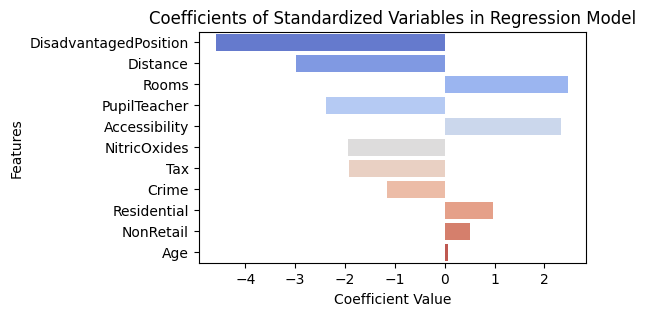

In [ ]:
# Coefficients from the model and corresponding features
coefficients = np.array([2.4811, 0.0757, -2.9734, 2.3284, -1.9094, -4.5836, -1.1635, -1.9343, -2.3769, 0.9758, 0.5093])
features = ['Rooms', 'Age', 'Distance', 'Accessibility', 'Tax', 'DisadvantagedPosition', 'Crime',
            'NitricOxides', 'PupilTeacher', 'Residential', 'NonRetail']

# Create a dataframe for visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the dataframe by the absolute values of coefficients
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(5,3 ))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm')
plt.title('Coefficients of Standardized Variables in Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


This code will create a bar plot where each bar represents a feature from your regression model, and the length of the bar indicates the magnitude of the feature's coefficient. This visual representation can help you quickly identify which features have the most significant positive or negative influence on the predicted house prices. ​

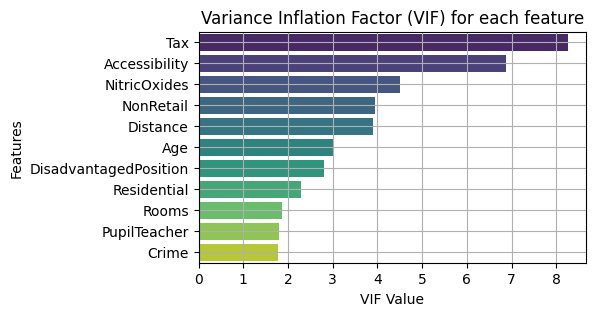

In [ ]:
# VIF values and corresponding features
vif_values = [1.865854, 3.025022, 3.911176, 6.874882, 8.251760, 2.814205, 1.769403, 4.508764, 1.806661, 2.281945, 3.956566]
features = ['Rooms', 'Age', 'Distance', 'Accessibility', 'Tax', 'DisadvantagedPosition', 'Crime',
            'NitricOxides', 'PupilTeacher', 'Residential', 'NonRetail']

# Create a dataframe for visualization
vif_df = pd.DataFrame({'Feature': features, 'VIF': vif_values})

# Sort the dataframe by VIF values
vif_df = vif_df.sort_values(by='VIF', ascending=False)

# Plotting
plt.figure(figsize=(5, 3))
sns.barplot(x='VIF', y='Feature', data=vif_df, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for each feature')
plt.xlabel('VIF Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()


This bar plot is showing the Variance Inflation Factor (VIF) for various features in the dataset. VIF is a measure of how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will all be equal to 1. This visualization helps in identifying which features might be causing multicollinearity issues in a regression model, allowing for further analysis or modification of the model (like removing or combining features) to address these issues.

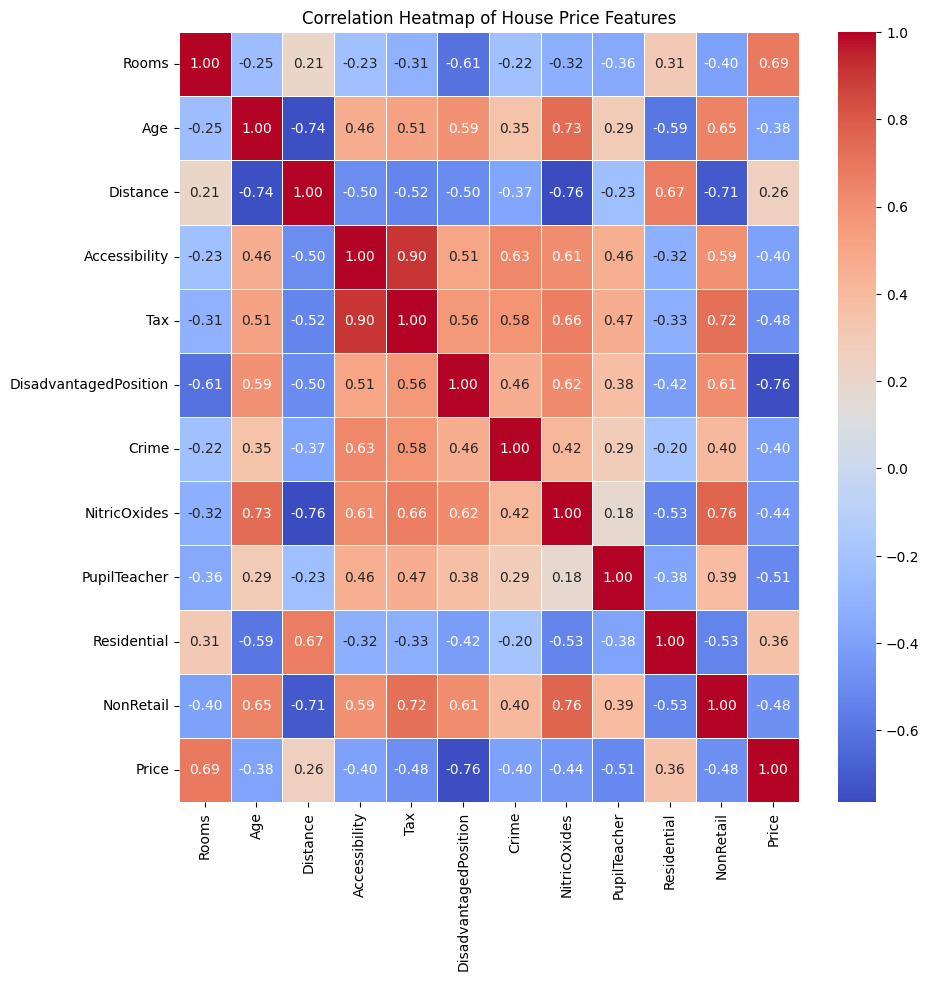

In [ ]:
# Load your data
data = pd.read_excel('/content/house.xlsx')

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 10
                    ))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of House Price Features')
plt.show()


The generated heatmap is a graphical representation of the correlations among various features in a dataset concerning house prices. Each cell in the heatmap contains a numeric value, providing a precise correlation coefficient between each pair of features. These coefficients range from -1 to 1, with values closer to 1 or -1 indicating stronger relationships, either positive or negative, respectively.

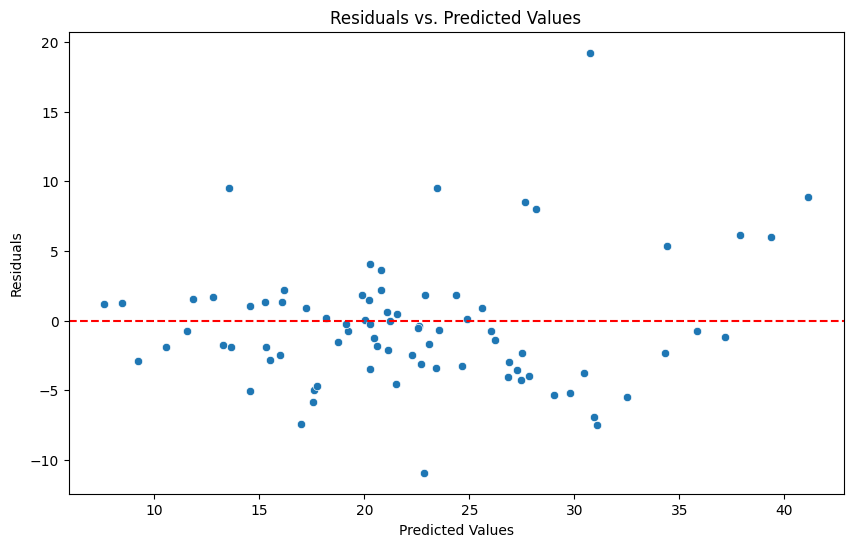

In [ ]:
# Load your data
data = pd.read_excel('/content/house.xlsx')

# Define your independent and dependent variables
X = data.drop('Price', axis=1)
y = data['Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


The graph is a scatter plot that visually represents the residuals (differences between actual and predicted values) of a linear regression model against the predicted values for a house pricing dataset.

In this plot:

X-axis (Predicted Values): The predicted house prices by your model are plotted along the x-axis. These values are the model's estimations based on the independent variables of the dataset.

Y-axis (Residuals): The residuals, calculated as the difference between the actual house prices (y_test) and the predicted prices (y_pred), are plotted on the y-axis. The residual for each point is a measure of how far off the model's prediction was from the actual value.

Horizontal Line: The horizontal dashed red line at y=0 represents the point where the predicted value perfectly matches the actual value. Residuals above this line indicate underestimation by the model, and those below indicate overestimation.

Interpretation: Ideally, in a well-fitted model, the residuals should be randomly scattered around the horizontal line with no discernible pattern. This would indicate that the model is accurate and consistent across different values. If there is a pattern (like a curve or clustering of residuals), it suggests that the model might be missing some explanatory variables or there might be non-linear relationships not captured by the model.

This type of plot is crucial for diagnosing the fit of a regression model, helping to identify issues like heteroscedasticity or biases in prediction.

In [3]:
# Assuming you have the R-squared value as 'r2'
accuracy = r2 * 100
print("Accuracy of the model:", accuracy)


NameError: ignored